# Trabajo Práctico Final - Curso Data Science - Coder House

#### Empresa / Organización / Problema Específico
Predicción de retrasos en la aviación comercial en Estados Unidos.

#### Objetivo de la Investigación

Mejorar los servicios prestados a los pasajeros mediante la predicción de retrasos; conociendo la aerolinea que opera el vuelo, el día de la semana en la que está programado, su origen y destino.

#### Equipo
El equipos se encuentra conformado por:
* Iván Arango 
* Natalia Johansen 
* Ignacio Piana


#### Fuente de datos
El dataset a utilizar se obtuvo de Kaggle --> https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

// Detallar criterios de seleccion (Data Acquisition)

## Análisis de datos - Airlines

### 1. Carga de datos 

In [2]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
# Lectura del csv
df_air = pd.read_csv('Airlines.csv', sep=',')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


**Data Features**

1. **Airline:** Diferentes tipos de aerolineas comerciales
2. **Flight:** Número de Vuelo
3. **Airport From:** Aeropuesto de salida
4. **Airport To:** Aeropuerto de llegada
5. **DayOfWeek:** Día de la semana en el que se realiza el vuelo
6. **Time:** Duración del vuelo (minutos)
7. **Length:** Distancia
8. **Delay:** booleano si el vuelo tuvo demoras o no

### 2. Explotando los datos

In [4]:
# Qué tamaño tienen los datos?
df_air.shape

(539383, 9)

In [5]:
# Hay valores nulos en los datos?
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
# Como se distribuyen las variables numéricas
df_air.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
# Como se comportan las variables categóricas
df_air.describe(include=['O'])

,Airline,AirportFrom,AirportTo
count,539383,539383,539383
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


*Resumen de los datos:*

Los datos se relacionan con la industria de la aviación comercial estadounidese. 
Contamos con 539.383 observaciones y 6 variables.
También resulta importante mencionar que no tenemos valores faltantes en nuestro dataset.

#### 2.1 Data Wrangling

En la distribución de las variables númericas hemos identificado que existen vuelos con distancia 0 (Length = 0). Procedemos a eliminar estos registros 

In [8]:
df_air.drop(df_air[df_air.Length == 0].index, inplace=True)
df_air.shape

(539379, 9)

Creamos una nueva columna con agrupacion de los tiempos de vuelos

In [9]:
df_air.loc[df_air['Time'] <= 500, 'TimeGroups'] = '<= 500'
df_air.loc[df_air['Time'].between(500, 801, inclusive='neither'), 'TimeGroups'] = '501 - 800'
df_air.loc[df_air['Time'].between(800, 1101, inclusive='neither'), 'TimeGroups'] = '801 - 1100'
df_air.loc[df_air['Time'] > 1100, 'TimeGroups'] = '> 1100'

df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100


Creamos una nueva columna con la agrupación de las distancias

In [10]:
df_air.loc[df_air['Length'] <= 80, 'LengthGroups'] = '<= 80'
df_air.loc[df_air['Length'].between(80, 141, inclusive='neither'),  'LengthGroups'] = '81 - 140'
df_air.loc[df_air['Length'].between(140, 201, inclusive='neither'),  'LengthGroups'] = '141 - 200'
df_air.loc[df_air['Length'] > 200, 'LengthGroups'] = '> 200'
df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500,> 200
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500,> 200
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500,141 - 200
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500,141 - 200
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500,> 200
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100,> 200
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100,> 200
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100,> 200
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100,> 200


#### 2.2 Análisis Univariado

In [11]:
# Analisis de Vuelos
un_flight = df_air['Flight'].unique()
print(len(un_flight))

6585


El dataset cuenta con 6585 vuelos unicos

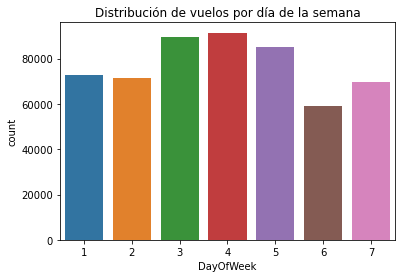

In [12]:
# Analisis Días de la semana
fig, ax = plt.subplots()
ax = sns.countplot(x='DayOfWeek', data=df_air)
ax.set(title='Distribución de vuelos por día de la semana')
plt.show()

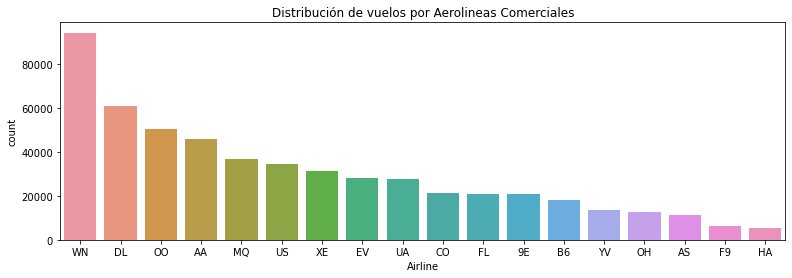

In [13]:
# Analisis Aerolineas
plt.figure(figsize=(13, 4))
sns.countplot(x='Airline', data=df_air, order = df_air.Airline.value_counts().index)
plt.title('Distribución de vuelos por Aerolineas Comerciales')
plt.show()

**Diccionario de Aerolineas (según fuente de origen en KAGGLE):**
- Alaska Airlines AS / ASA
- American Airlines AA/AAL
- Air Canada AC/AC
- Aeromexico AM / AMX
- Continental Airlines CO / COA
- Delta Airlines DL / DAL
- FedEx FX / FDX
- Hawaiian Airlines HA / HAL
- Northwest Airlines NW / NWA
- Polar Air Cargo PO / PAC
- Southwest Airlines SW / SWA
- United Airlines UA / UAL
- United Parcel (UPS) 5X / UPS
- Virgin Atlantic VS / VIR
- VivaAerobús VB / VIV
- WestJet WS / WJ

<AxesSubplot:>

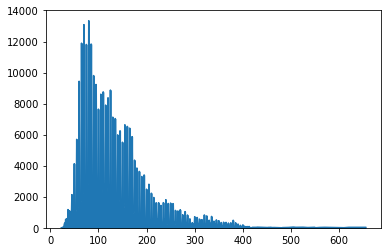

In [14]:
# Análisis de Distincia
df_air['Length'].value_counts().sort_index().plot.area()

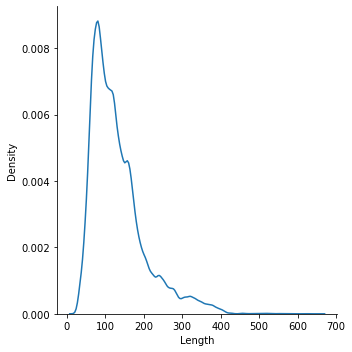

In [15]:
sns.displot(x='Length', data=df_air, kind="kde")

La variable 'Length' cuenta con una distribución "Asimétrica hacia la izquierda".
A su vez, evidencia que las distancias absolutas de los vuelos se concentraron entre las 50 y las 200 millas. Con un valor mínimo de 0 y un máximo de 655. En total, 4 registros contaban con una distancia igual a cero, por lo que decidimos excluirlos del análisis.

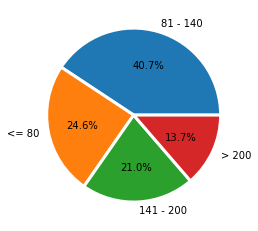

In [16]:
# Distribucion de agrupacion de Distancia
lgroup = df_air['LengthGroups'].value_counts()
plt.pie(lgroup, autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=lgroup.index)
plt.show()

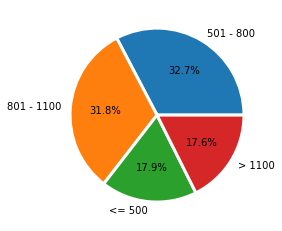

In [17]:
# Distribucion de agrupacion de Tiempos
tgroup = df_air['TimeGroups'].value_counts()
plt.pie(tgroup, autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=tgroup.index)
plt.show()

#### 2.3 Correlación de variables

In [18]:
df_air.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'TimeGroups', 'LengthGroups'],
      dtype='object')

<AxesSubplot:>

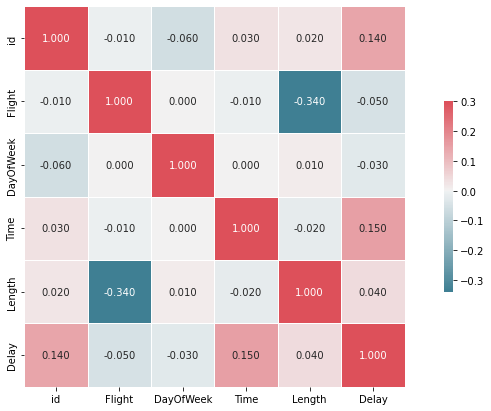

In [50]:
correlation = df_air.corr().round(2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt =".3f")

#### 2.4 Estudio de la variable Target --> "Delay"

In [20]:
# Distribucion de Retrasos
df_air.groupby(['Delay']).count()['id']

Delay
0    299116
1    240263
Name: id, dtype: int64

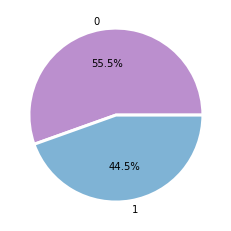

In [21]:
Delays = df_air['Delay'].value_counts()
plt.pie(Delays, colors=['#BB8FCE', '#7FB3D5'], autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=Delays.index)
plt.show()

In [22]:
# Delay vs Airline
df_air.groupby(['Delay','Airline']).count()['id']

Delay  Airline
0      9E         12460
       AA         27920
       AS          7579
       B6          9653
       CO          9161
       DL         33488
       EV         16728
       F9          3554
       FL         14552
       HA          3792
       MQ         23863
       OH          9128
       OO         27494
       UA         18673
       US         22909
       WN         28440
       XE         19331
       YV         10391
1      9E          8226
       AA         17736
       AS          3892
       B6          8458
       CO         11957
       DL         27452
       EV         11255
       F9          2899
       FL          6275
       HA          1786
       MQ         12742
       OH          3502
       OO         22760
       UA          8946
       US         11591
       WN         65657
       XE         11795
       YV          3334
Name: id, dtype: int64

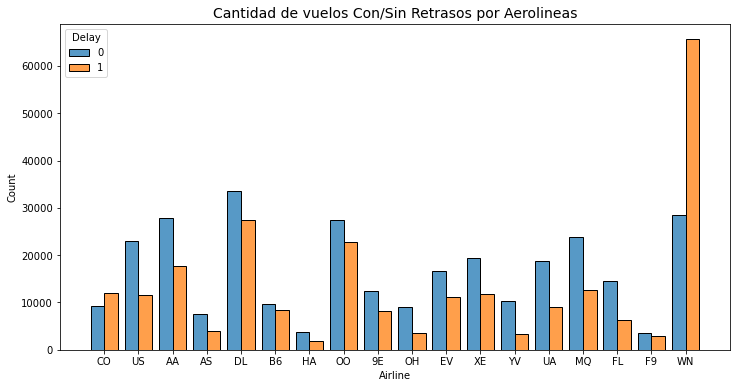

In [53]:
plt.figure(figsize = (12,6))
sns.histplot(data=df_air, x = df_air['Airline'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.title('Cantidad de vuelos Con/Sin Retrasos por Aerolineas', fontsize = 14)
plt.show()

In [25]:
df_aux = df_air.groupby(['Airline', 'Delay'])['id'].count().rename('%Delay_Airline').groupby(level = 0).transform(lambda x: (x/x.sum())*100).round(2)
df_aux

Airline  Delay
9E       0        60.23
         1        39.77
AA       0        61.15
         1        38.85
AS       0        66.07
         1        33.93
B6       0        53.30
         1        46.70
CO       0        43.38
         1        56.62
DL       0        54.95
         1        45.05
EV       0        59.78
         1        40.22
F9       0        55.08
         1        44.92
FL       0        69.87
         1        30.13
HA       0        67.98
         1        32.02
MQ       0        65.19
         1        34.81
OH       0        72.27
         1        27.73
OO       0        54.71
         1        45.29
UA       0        67.61
         1        32.39
US       0        66.40
         1        33.60
WN       0        30.22
         1        69.78
XE       0        62.11
         1        37.89
YV       0        75.71
         1        24.29
Name: %Delay_Airline, dtype: float64

En 16 de las 18 aerolíneas la cantidad de vuelos sin retrasos es superior a la cantidad de vuelos con retrasos. Llamativamente, encontramos la situación inversa en WN, la aerolínea con mayor cantidad de vuelos, y en CO, una de las aerolíneas con menor cantidad de vuelos registrados.

In [26]:
# Delay vs DayOfWeek
df_air.groupby(['Delay','DayOfWeek']).count()['id']

Delay  DayOfWeek
0      1            38739
       2            39427
       3            47492
       4            50201
       5            49733
       6            35339
       7            38185
1      1            34030
       2            31913
       3            42254
       4            41244
       5            35515
       6            23615
       7            31692
Name: id, dtype: int64

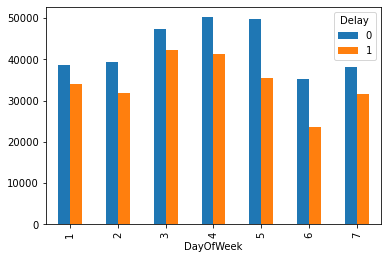

In [27]:
group_day = df_air.groupby(['Delay','DayOfWeek']).count()['id']
(group_day.unstack(level=0).plot.bar())
plt.show()

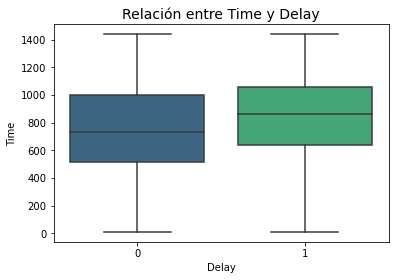

In [51]:
# Delay vs Time
#plt.figure(figsize = (8,6))
sns.boxplot( x=df_air['Delay'], y=df_air['Time'], palette = 'viridis')
plt.title('Relación entre Time y Delay', fontsize = 14)
plt.show()

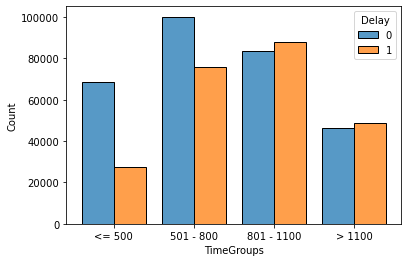

In [55]:
# Delay vs TimeGroups
sns.histplot(data=df_air, x = df_air['TimeGroups'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.show()

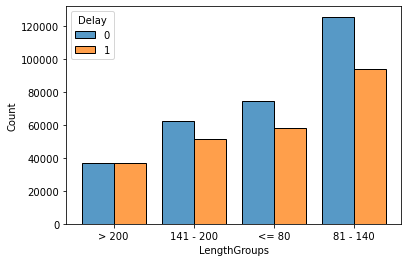

In [56]:
# Delay vs LengthGroups 
sns.histplot(data=df_air, x = df_air['LengthGroups'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.show()

#### 2.5 Análisis Multivariado

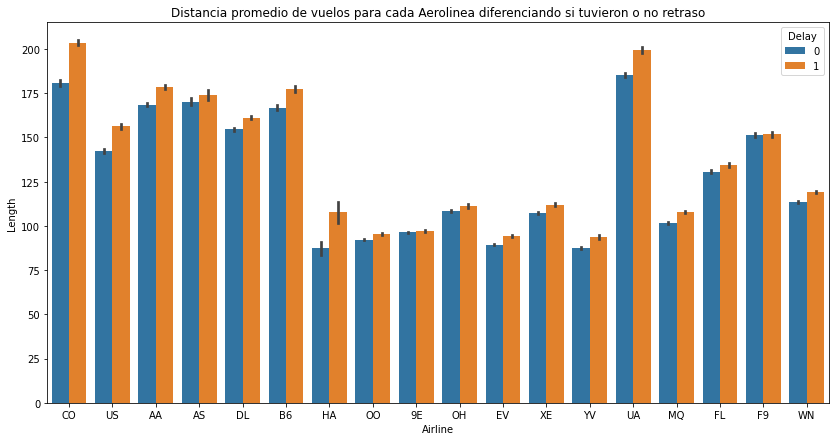

In [31]:
%matplotlib inline
plt.figure(figsize = (14,7))
sns.barplot(x = df_air['Airline'], y = df_air['Length'], hue=df_air['Delay']) 
plt.title('Distancia promedio de vuelos para cada Aerolinea diferenciando si tuvieron o no retraso')
plt.show()

El gráfico de barra calcula el promedio de campo "Length" por aerolinea diferenciando aquellos que presentaron retrasos versus aquellos que no.

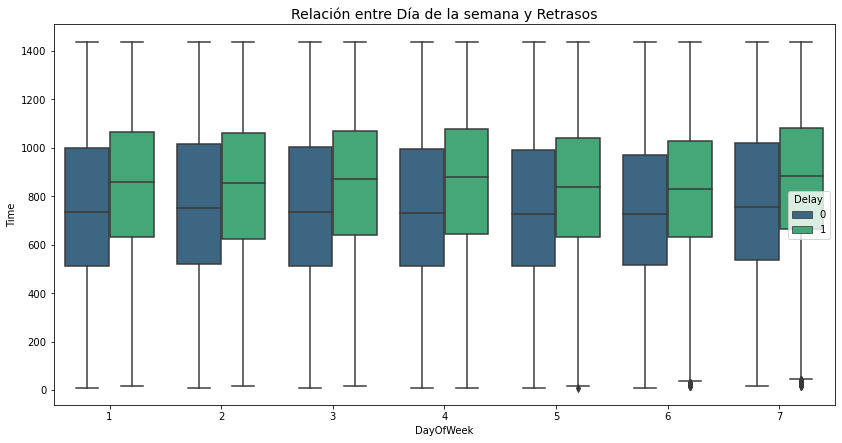

In [32]:
plt.figure(figsize = (14,7))
sns.boxplot( x=df_air['DayOfWeek'], y=df_air['Time'], hue=df_air['Delay'], palette = 'viridis')
plt.title('Relación entre Día de la semana y Retrasos', fontsize = 14)
plt.show()

El boxplot anterior muestra la relación entre días de la semana, el tiempo y la existencia (o inexistencia) de retrasos. Decidimos hacer este análisis partiendo de la base del desafío anterior (análisis bivariado de tiempo y retrasos) para detectar posibles variaciones entre los días de la semana.